<a href="https://colab.research.google.com/github/sagarbudhthoki/FinalThesis_11495435/blob/main/Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import Image

import tensorflow as tf
from keras.models import Model



from tensorflow.keras.models import Sequential,load_model, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout,MaxPool2D, LSTM, GRU, BatchNormalization,Input
from tensorflow.keras.layers import Embedding, concatenate, Reshape,Activation
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping,ModelCheckpoint
from tensorflow.keras.layers import ELU


from tensorflow.keras.layers.experimental.preprocessing import RandomFlip
import tensorflow.keras.layers as tfl
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')

provide the mounted path for file and directory


In [ ]:
path="/content/drive/MyDrive/train_images/train.csv"

load the dataset


In [ ]:
df=pd.read_csv(path)

In [ ]:
df.head()

,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45


In [ ]:
df.shape

(10407, 4)

In [ ]:
num_class=len(df.label.unique())
display("Number of Classes:",num_class)

'Number of Classes:'

10

In [ ]:
img_rows, img_cols = 256, 256
batch_size = 64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  10407 non-null  object
 1   label     10407 non-null  object
 2   variety   10407 non-null  object
 3   age       10407 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 325.3+ KB


In [ ]:
df['label'] = df['label'].astype('str')
df['variety'] = df['variety'].astype('str')

In [ ]:
df.describe()

,age
count,10407.000000
mean,64.043624
std,8.958830
min,45.000000
25%,60.000000
50%,67.000000
75%,70.000000
max,82.000000


In [ ]:
df['label'].value_counts()

normal                      1764
blast                       1738
hispa                       1594
dead_heart                  1442
tungro                      1088
brown_spot                   965
downy_mildew                 620
bacterial_leaf_blight        479
bacterial_leaf_streak        380
bacterial_panicle_blight     337
Name: label, dtype: int64

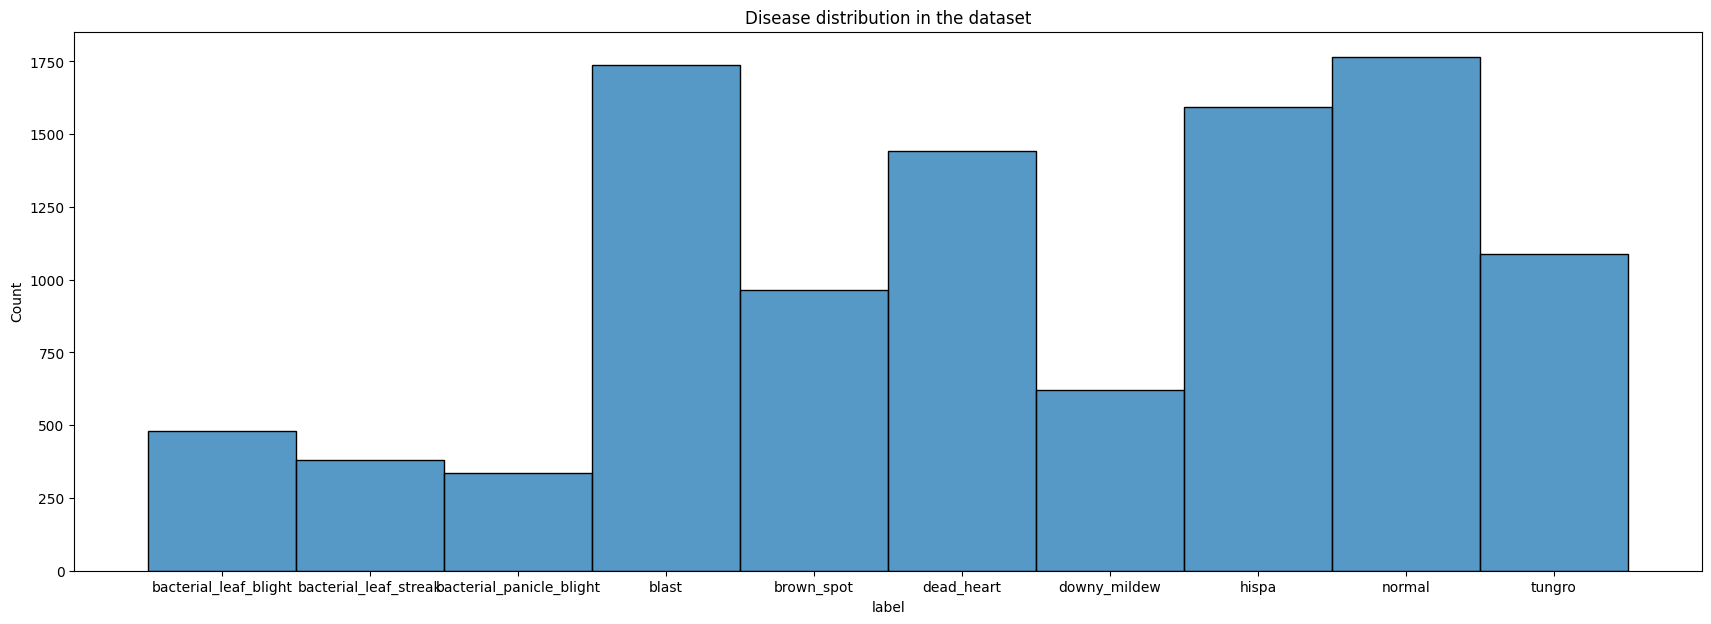

In [ ]:
fig,axes = plt.subplots(1,1,figsize=(21,7))
sns.histplot(df,x='label',bins=10,ax=axes)
plt.title('Disease distribution in the dataset')
plt.show()

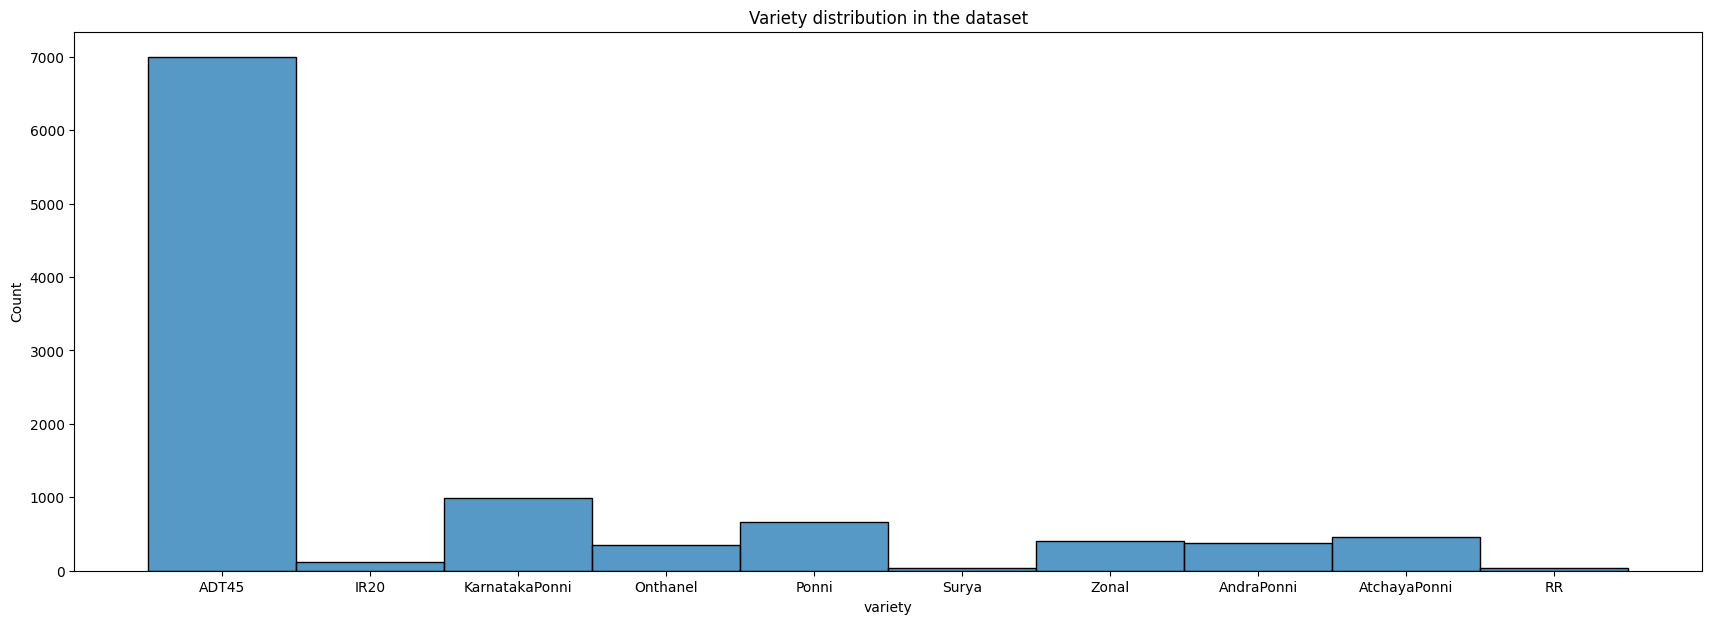

In [ ]:
fig,axes = plt.subplots(1,1,figsize=(21,7))
sns.histplot(df,x='variety',ax=axes)
plt.title('Variety distribution in the dataset')
plt.show()

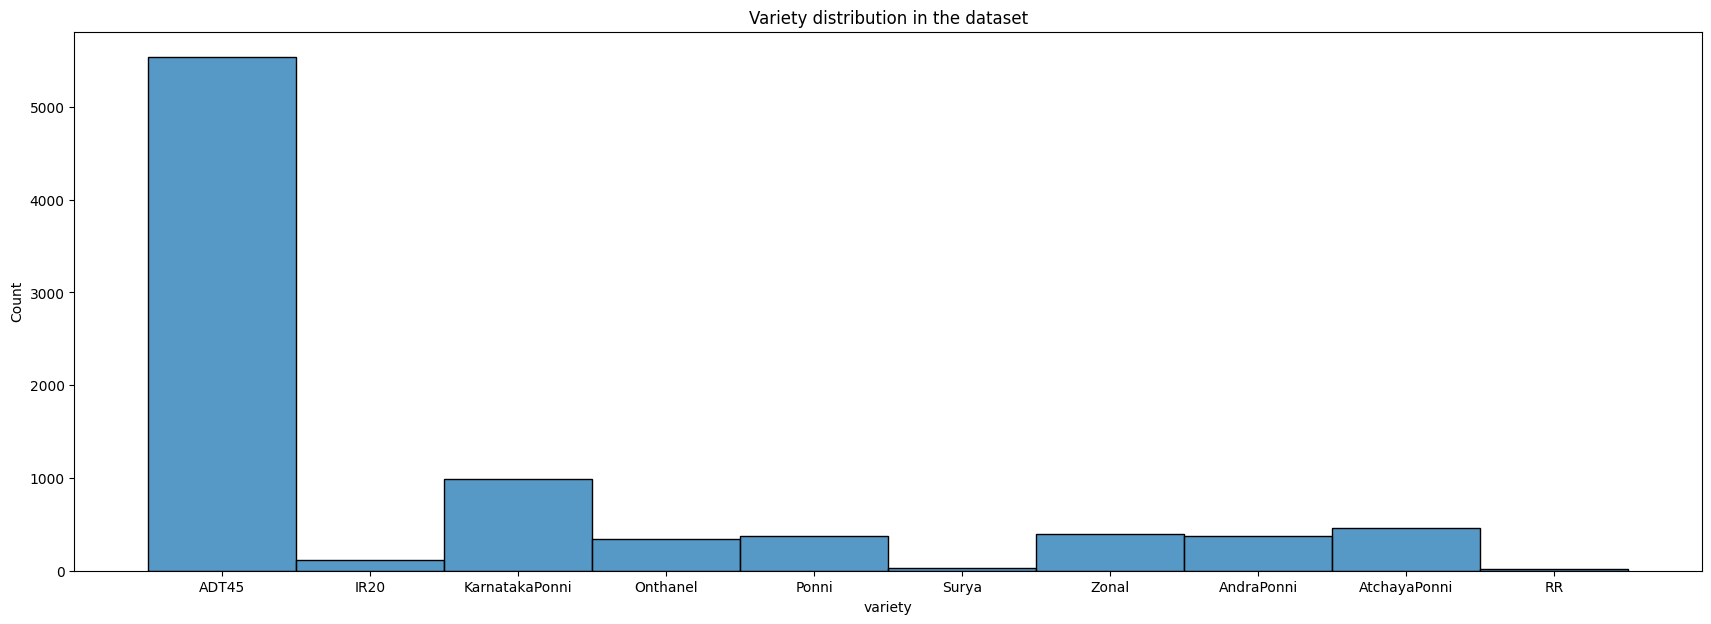

In [ ]:
fig,axes = plt.subplots(1,1,figsize=(21,7))
sns.histplot(df[df['label']!='normal'],x='variety',ax=axes)
plt.title('Variety distribution in the dataset')
plt.show()

In [ ]:
df[df['label']!='normal']['variety'].value_counts()

ADT45             5535
KarnatakaPonni     988
AtchayaPonni       461
Zonal              399
AndraPonni         377
Ponni              376
Onthanel           343
IR20               114
Surya               32
RR                  18
Name: variety, dtype: int64

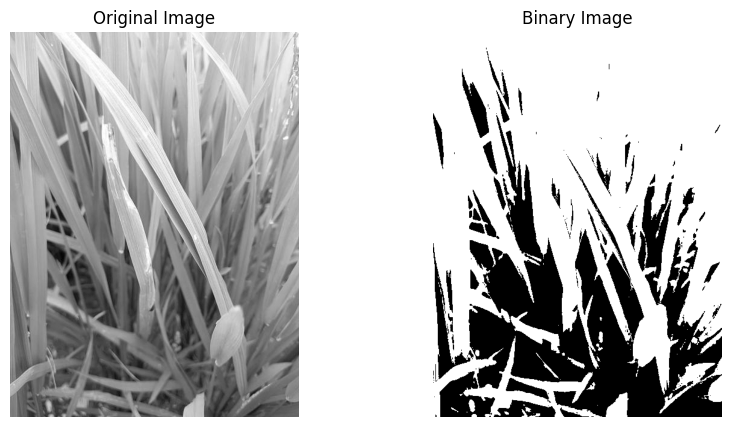

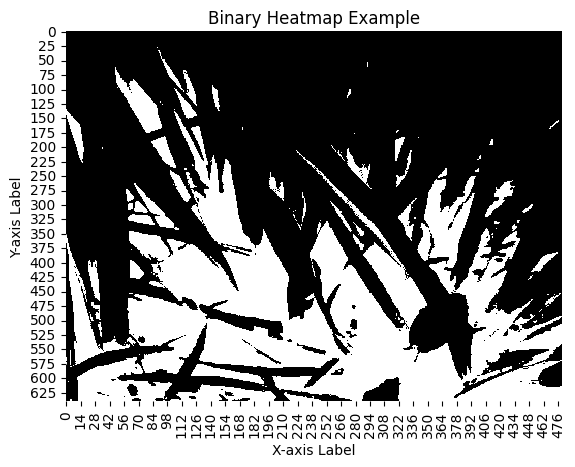

In [2]:
# Load the image (replace 'path_to_your_image.jpg' with the path to your image)
image_data = '/content/drive/MyDrive/test_images/200005.jpg'
image = cv2.imread(image_data, cv2.IMREAD_GRAYSCALE)

# Apply thresholding (replace 'threshold_value' with your desired threshold)
threshold_value = 128
ret, binary_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

# Display the original and binary images using matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

plt.show()

# Create a heatmap using Seaborn from the binary image
sns.heatmap(binary_image, annot=False, cmap='binary', cbar=False)

# Customize the plot (optional)
plt.title('Binary Heatmap Example')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')

# Display the heatmap
plt.show()

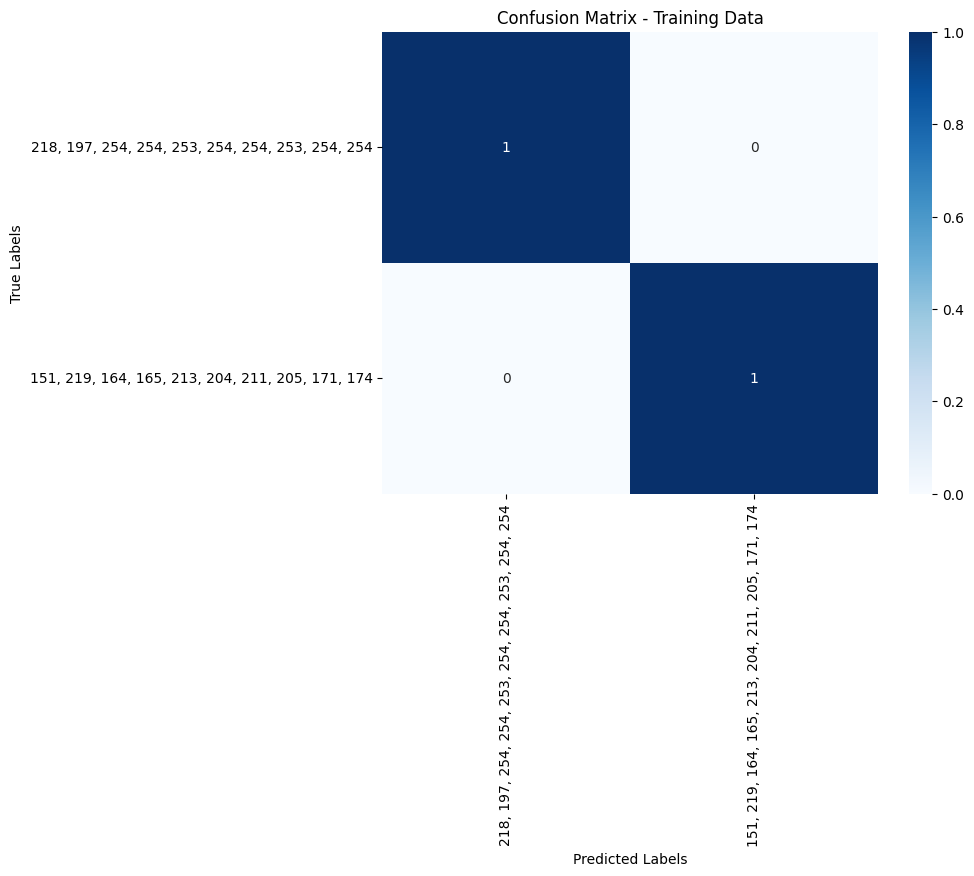

In [8]:
# 1. Train your model and obtain predicted and true labels for the training data
# Assuming you have the following:
# y_pred: Predicted labels for training data (as a list or NumPy array)
# y_true: True labels for training data (as a list or NumPy array)

# 2. Convert the image data into a format suitable for computing the confusion matrix
# Depending on your framework and data representation, you may need to organize the data accordingly.
# For example, in TensorFlow, you might use a DataLoader to batch and preprocess the images.

# 3. Compute the confusion matrix
from sklearn.metrics import confusion_matrix

# Assuming you have class labels of train image data after converting into list.
class_labels = ['218, 197, 254, 254, 253, 254, 254, 253, 254, 254','151, 219, 164, 165, 213, 204, 211, 205, 171, 174']  # Replace with your actual class labels
y_true=np.array(class_labels)
y_pred=np.array(class_labels)
# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# 4. Plot the confusion matrix as a heatmap using seaborn
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix - Training Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
images = ['/content/drive/MyDrive/train_images/hispa/106590.jpg',\
          '/content/drive/MyDrive/train_images/tungro/109629.jpg',\
          '/content/drive/MyDrive/train_images/bacterial_leaf_blight/109372.jpg',\
          '/content/drive/MyDrive/train_images/downy_mildew/102350.jpg',\
          '/content/drive/MyDrive/train_images/blast/110243.jpg',\
          '/content/drive/MyDrive/train_images/bacterial_leaf_streak/101104.jpg',\
          '/content/drive/MyDrive/train_images/normal/109760.jpg',\
          '/content/drive/MyDrive/train_images/brown_spot/104675.jpg',\
          '/content/drive/MyDrive/train_images/dead_heart/105159.jpg',\
          '/content/drive/MyDrive/train_images/bacterial_panicle_blight/101351.jpg',\
         ]
diseases = ['hispa','tungro','bacterial_leaf_blight','downy_mildew','blast','bacterial_leaf_streak',\
           'normal','brown_spot','dead_heart','bacterial_panicle_blight']
diseases = [disease +' disease' for disease in diseases]

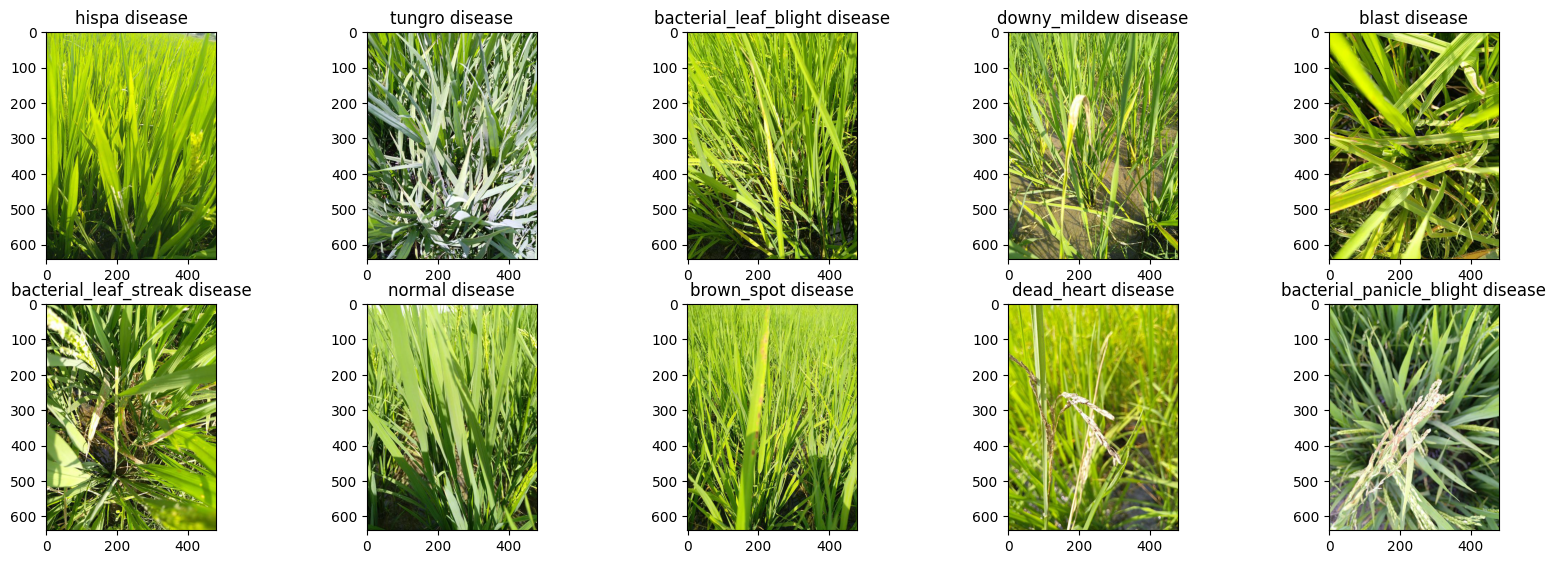

In [ ]:
plt.figure(figsize=(20,10))
columns = 5
for i, image_loc in enumerate(images):
    plt.subplot(len(images)//columns + 1, columns, i + 1)
    image=plt.imread(image_loc)
    plt.title(diseases[i])
    plt.imshow(image)

In [ ]:
aug_gens = ImageDataGenerator(
    rescale=1.0/255.0,
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    validation_split=0.1,
    rotation_range=10,
    shear_range=0.25,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
)

In [ ]:
train_loc = '/content/drive/MyDrive/train_images'
train_data = aug_gens.flow_from_directory(
    train_loc,
    subset="training",
    seed=2,
    target_size=(img_rows, img_cols),
    batch_size=batch_size,
    class_mode="categorical")

Found 9379 images belonging to 10 classes.


In [ ]:
valid_data = aug_gens.flow_from_directory(
    train_loc,
    subset="validation",
    seed=2,
    target_size=(img_rows, img_cols),
    batch_size=batch_size,
    class_mode="categorical")

Found 1037 images belonging to 10 classes.


In [ ]:
test_loc = '/content/drive/MyDrive/test_images'
test_data = ImageDataGenerator(rescale=1.0/255).flow_from_directory(
    directory=test_loc,
    target_size=(img_rows, img_cols),
    batch_size=batch_size,
    classes=['.'],
    shuffle=False,
)

Found 3469 images belonging to 1 classes.


In [ ]:
print(train_data.class_indices)
print(len(train_data.class_indices))

{'bacterial_leaf_blight': 0, 'bacterial_leaf_streak': 1, 'bacterial_panicle_blight': 2, 'blast': 3, 'brown_spot': 4, 'dead_heart': 5, 'downy_mildew': 6, 'hispa': 7, 'normal': 8, 'tungro': 9}
10


In [ ]:
leakyrelu = tf.keras.layers.LeakyReLU(alpha=0.01)

[-2.68280104e-03 -6.37735836e-03 -1.48357389e-02 -3.34642546e-02
 -7.19448398e-02 -1.42277620e-01 -2.38405844e-01 -2.68941421e-01
  0.00000000e+00  7.31058579e-01  1.76159416e+00  2.85772238e+00
  3.92805516e+00]


<function matplotlib.pyplot.show(close=None, block=None)>

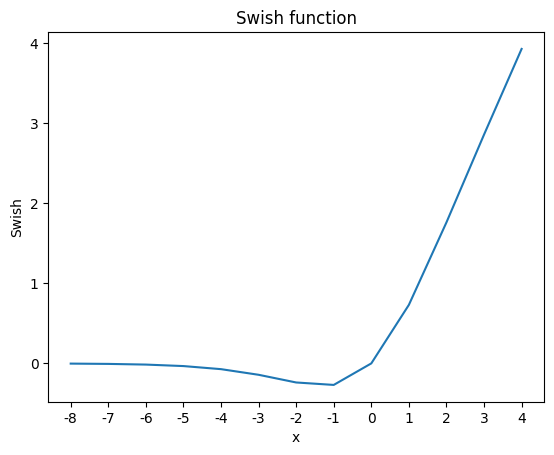

In [ ]:
x = np.arange(-8,5)
swish = x/(1+np.exp(-x))
print(swish)
pd.Series(swish).plot(kind='line')
plt.title('Swish function')
plt.xticks(range(len(x)),x)
plt.ylabel('Swish')
plt.xlabel('x')
plt.show

In [ ]:
input_layer = Input((img_rows,img_cols,3))
conv2d_1_1 = Conv2D(filters=16, kernel_size=3,strides =(1,1), activation='relu', padding="same", name ="conv2d_branch1")(input_layer)
maxpool = MaxPool2D(pool_size=[2,2])(conv2d_1_1)

conv2d_1_2 = Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding="same")(maxpool)
maxpool = MaxPool2D(pool_size=[2,2])(conv2d_1_2)

conv2d_1_3 = Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding="same")(maxpool)
maxpool = MaxPool2D(pool_size=[2,2])(conv2d_1_3)

conv2d_1_4 = Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding="same")(maxpool)
maxpool = MaxPool2D(pool_size=[2,2])(conv2d_1_4)

flatten = Flatten()(maxpool)
dense_1 = Dense(1024, activation='swish')(flatten)
dense_2 = Dense(128, activation='swish')(dense_1)

output_dense = Dense(num_class, activation="softmax")(dense_2)

model = Model(inputs=[input_layer], outputs=[output_dense])

In [ ]:
def conv_layer(input,filter=64,strides=2):
    conv_1 = Conv2D(filter, kernel_size=3,strides=strides ,padding='same',activation = 'relu',kernel_initializer = 'glorot_normal')(input)
    conv_2 = Conv2D(filter, kernel_size=3,strides=strides , padding='same',kernel_initializer = 'glorot_normal')(conv_1)
    bn     = BatchNormalization(axis=3)(conv_2)
    act    = Activation('relu')(bn)
    pool   = MaxPool2D((2,2))(act)
    return pool

In [ ]:
def build_model():
    input  = Input((img_rows,img_cols,3))
    conv_1 = conv_layer(input,filter=16,strides=1)
    conv_2 = conv_layer(conv_1,filter=16,strides=1)
    pool = MaxPool2D((2,2))(conv_1)
    merge1 = concatenate([pool,conv_2], axis = 3)
    #pool = MaxPool2D((2,2))(merge1)

    conv_3 = conv_layer(merge1,filter=32,strides=1)
    conv_4 = conv_layer(conv_3,filter=32,strides=1)
    pool = MaxPool2D((2,2))(conv_3)
    merge2 = concatenate([pool,conv_4], axis = 3)
    #pool = MaxPool2D((2,2))(merge2)

    conv_5 = Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding="same") (merge2)
    pool = MaxPool2D(pool_size=[2,2])(conv_5)

    conv_6 = Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding="same")(pool)
    pool = MaxPool2D(pool_size=[2,2])(conv_6)

    dense  = Flatten()(pool)
    dense  = Dense(128,activation='relu')(dense)
    drop   = Dropout(0.4)(dense)
    dense  = Dense(64,activation='relu')(dense)
    output = Dense(num_class, activation='softmax')(drop)

    model = Model(inputs=[input],outputs = [output])
    return model

model = build_model()

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 256, 256, 16  448         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_4 (Conv2D)              (None, 256, 256, 16  2320        ['conv2d_3[0][0]']               
                                )                                                           

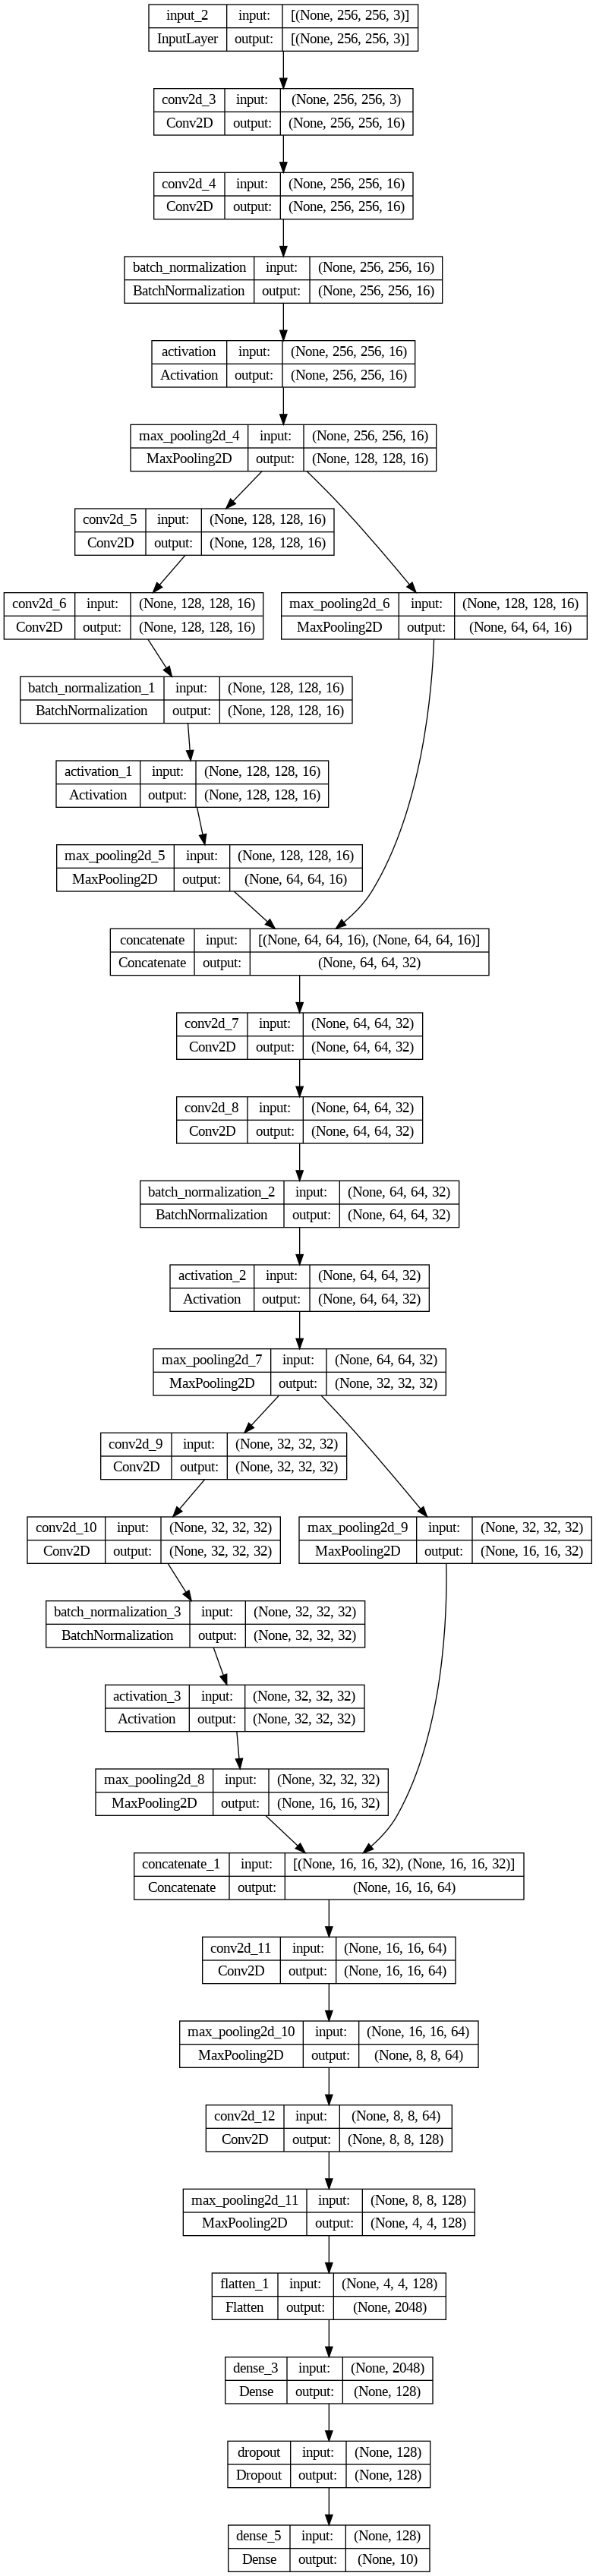

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)
Image("model.png")

In [ ]:
EPOCH = 8

lr_reduction = ReduceLROnPlateau(monitor='val_loss',patience=8, verbose=1,  factor=0.4, min_lr=0.0005)

early_stop = EarlyStopping(monitor='val_loss', min_delta=0.0005, patience=8, mode='auto', restore_best_weights=True, verbose=1)

checkpoint = ModelCheckpoint('model.hdf5', monitor='val_loss', save_best_only=True,verbose=1)

In [ ]:
model.compile(optimizer= 'adam',loss=tf.losses.CategoricalCrossentropy(),metrics=['accuracy'])
model_fit = model.fit(train_data, epochs=EPOCH ,batch_size = batch_size ,validation_data=valid_data, verbose =1,callbacks=[checkpoint,lr_reduction])

Epoch 1/8
147/147 [==============================] - ETA: 0s - loss: 2.0274 - accuracy: 0.2726 
Epoch 1: val_loss improved from inf to 2.29446, saving model to model.hdf5
147/147 [==============================] - 2892s 20s/step - loss: 2.0274 - accuracy: 0.2726 - val_loss: 2.2945 - val_accuracy: 0.1697 - lr: 0.0010
Epoch 2/8
147/147 [==============================] - ETA: 0s - loss: 1.7164 - accuracy: 0.4008 
Epoch 2: val_loss did not improve from 2.29446
147/147 [==============================] - 2082s 14s/step - loss: 1.7164 - accuracy: 0.4008 - val_loss: 2.7752 - val_accuracy: 0.1774 - lr: 0.0010
Epoch 3/8
147/147 [==============================] - ETA: 0s - loss: 1.5534 - accuracy: 0.4651 
Epoch 3: val_loss did not improve from 2.29446
147/147 [==============================] - 2092s 14s/step - loss: 1.5534 - accuracy: 0.4651 - val_loss: 2.9259 - val_accuracy: 0.1707 - lr: 0.0010
Epoch 4/8
  5/147 [>.............................] - ETA: 32:06 - loss: 1.5572 - accuracy: 0.4594

In [ ]:
from google.colab import drive
drive.mount('/content/drive')